###Bienvenido!! a Mall_Customers

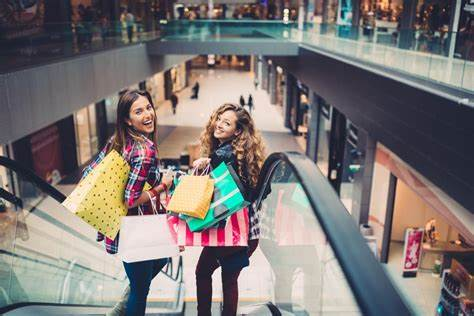

A continuacion daremos inicio a la investigacion a modo cientiifico buscando la evolucion y mejoras posibles garantizando el exito de la empreza.

###Librerias.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import seaborn as sb
import sklearn.tree as tree 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


###Precentacion


# Seccion abstracto

En este trabajo de ciencia de datos, se aborda el análisis de los clientes de un mercado, con el objetivo de identificar patrones y tendencias que permitan mejorar la estrategia de negocio. Para ello, se utilizarán técnicas de minería de datos y aprendizaje automático para extraer información relevante de los datos disponibles, como la frecuencia de compra, la preferencia por determinados productos o la relación entre los clientes y las promociones ofrecidas.

El análisis permitirá segmentar a los clientes según su perfil y sus hábitos de consumo, lo que facilitará la personalización de las ofertas y la elaboración de campañas de marketing más efectivas. Asimismo, se evaluarán las relaciones entre los clientes y renta anual,sus edades y puntuacion de gastos con el fin de determinar los factores que inciden en la fidelización y la satisfacción del cliente.

En resumen, este proyecto busca aportar información valiosa para la toma de decisiones en el ámbito comercial, con el fin de mejorar la experiencia del cliente y aumentar la rentabilidad del negocio.

#Investigacion de los datos

In [37]:
df=pd.read_csv('/content/Mall_Customers no supervisado.csv')
print(df.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [38]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (200, 5)
Nombre columnas: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


###Columnas nullos y tipos de datos

In [39]:
	
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Vemos que la base de datos no posee datos nulos pasamos al siguiente



procedimiento

<ipython-input-41-00e4875b7963>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.set_index('CustomerID').corr()


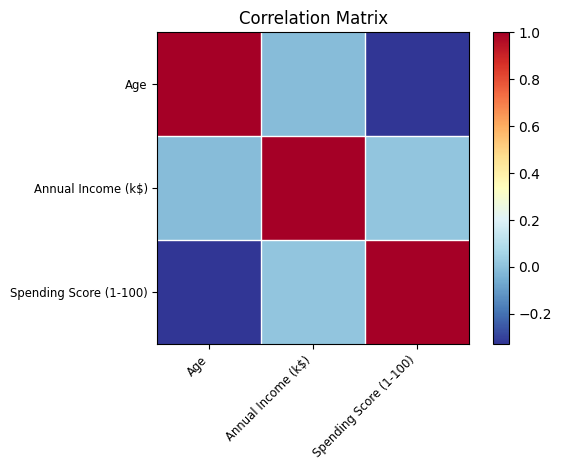

In [41]:
corr=df.set_index('CustomerID').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

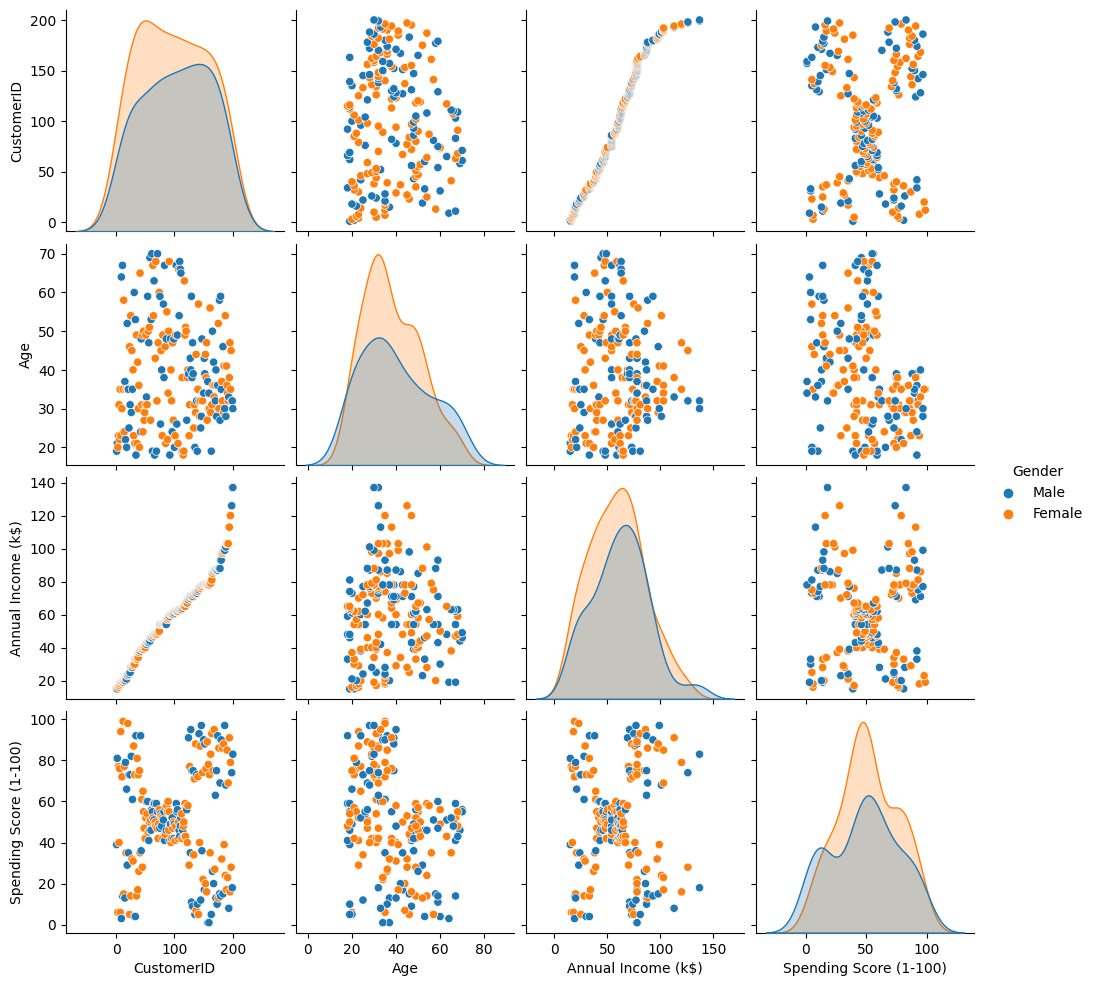

In [42]:
sb.pairplot(df, hue='Gender')

### descubrimos que los clientes femeninos prebalecen en todas las categorias.

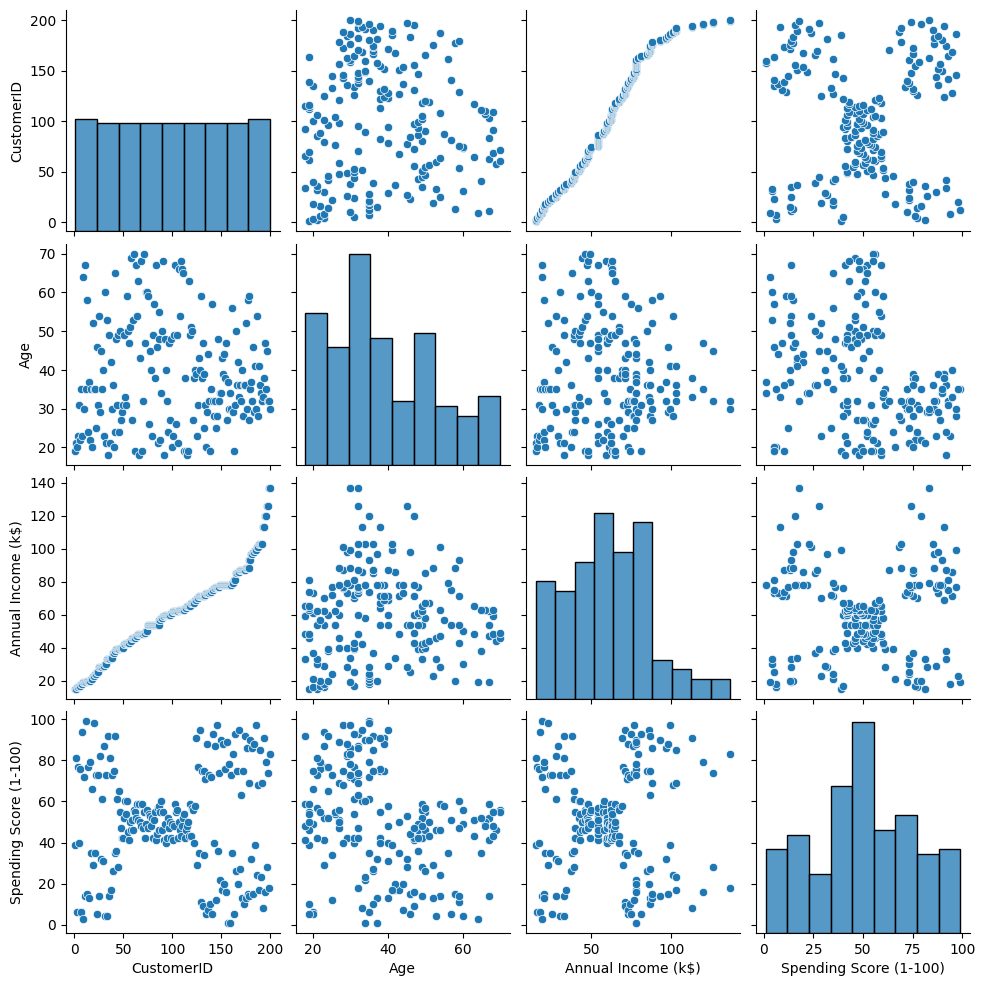

In [43]:
sb.pairplot(df)

##Encontramos que el pico de edad que mas consume son mujeres de 30 a 40 años despues de los cuarenta años sigue siendo mayor el consumo de mujeres hasta los 55.

##Los chico menores de 20 gastan mas que la mujeres a esa edad.

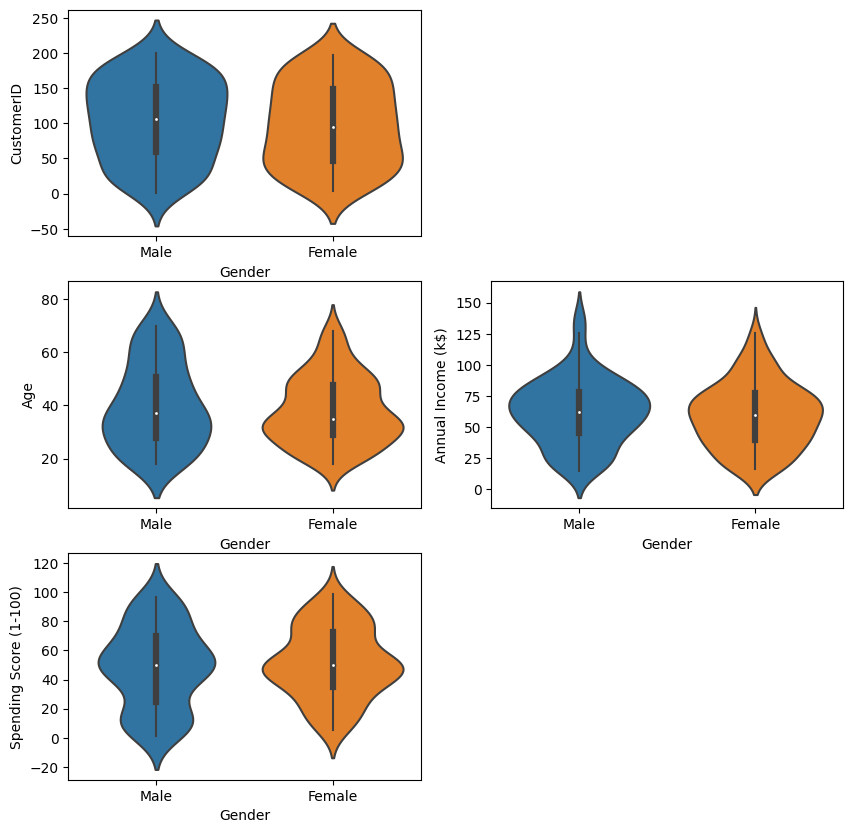

In [44]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df.columns):
    if column == 'Gender':
        continue
    plt.subplot(3,2, column_index +1)
    sb.violinplot(x='Gender', y=column, data=df)

In [45]:
all_inputs = df[['CustomerID','Annual Income (k$)',
       'Spending Score (1-100)']]
all_labels = df['Gender']
all_inputs[:5]

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


Detección de anomalías: detección de anomalías. Se puede utilizar técnicas de detección de anomalías para identificar patrones inusuales en los datos que pueden indicar un fraude o un comportamiento anómalo.

Análisis de sentimientos: El análisis de sentimientos es una tarea en la que se intenta determinar la actitud general de un grupo de usuarios o clientes en relación a un producto o servicio. Se pueden utilizar técnicas no supervisadas, como la agrupación de palabras o la exploración de temas para identificar patrones en los datos.

Reducción de la dimensionalidad: En muchas aplicaciones de data science, los datos pueden tener una gran cantidad de características o variables. La reducción de la dimensionalidad es una técnica no supervisada que se utiliza para reducir el número de características en los datos, manteniendo la información más importante.

Descubrimiento de asociaciones: La identificación de patrones o asociaciones entre variables es otra tarea común en data science no supervisado. Por ejemplo, se pueden utilizar técnicas de reglas de asociación para descubrir que los clientes que compran un cierto producto también tienden a comprar otro producto en particular.

#Clustering de clientes
para identificar grupos de clientes con características similares y así, mejorar la personalización de los productos y servicios.

In [46]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


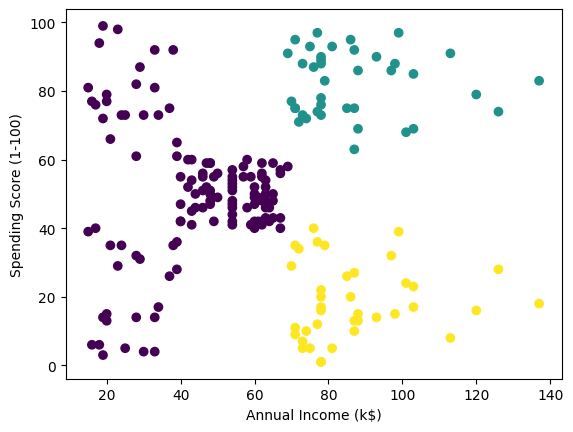

In [47]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

En el grafico anterior se detalla que aquellos que ganan desde 20 hasta 70 k anual manejan todo el campo desde o hasta 100 puntos de gasto, pero lo que mas se resalta y llama la atencion es que de 20 a 40 k tienen altos puntajes de gasto.

In [54]:
color_dict = {0: 'red', 1: 'green', 2: 'blue'}

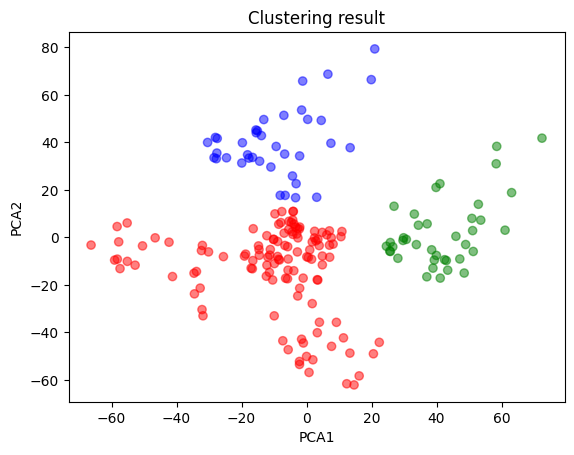

In [55]:
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'].apply(lambda x: color_dict[x]), alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering result')
plt.show()

#Detección de anomalías

Se identificara patrones inusuales en los datos que pueden indicar un fraude o un comportamiento anómalo.


In [50]:
clf = IsolationForest()
clf.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


IsolationForest()

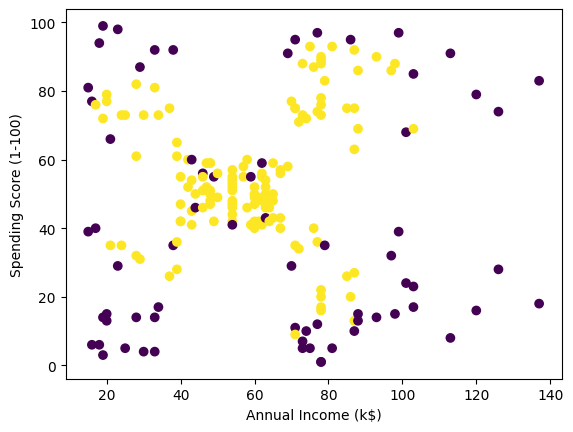

In [51]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=anomalies)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


#Reduccion de dimensionalidad
los datos pueden tener una gran cantidad de características o variables. La reducción de la dimensionalidad es una técnica no supervisada que se utiliza para reducir el número de características en los datos, manteniendo la información más importante.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

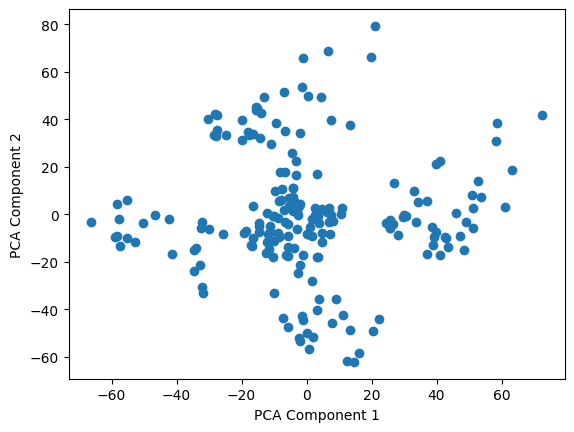

In [53]:
plt.scatter(df['pca1'], df['pca2'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()